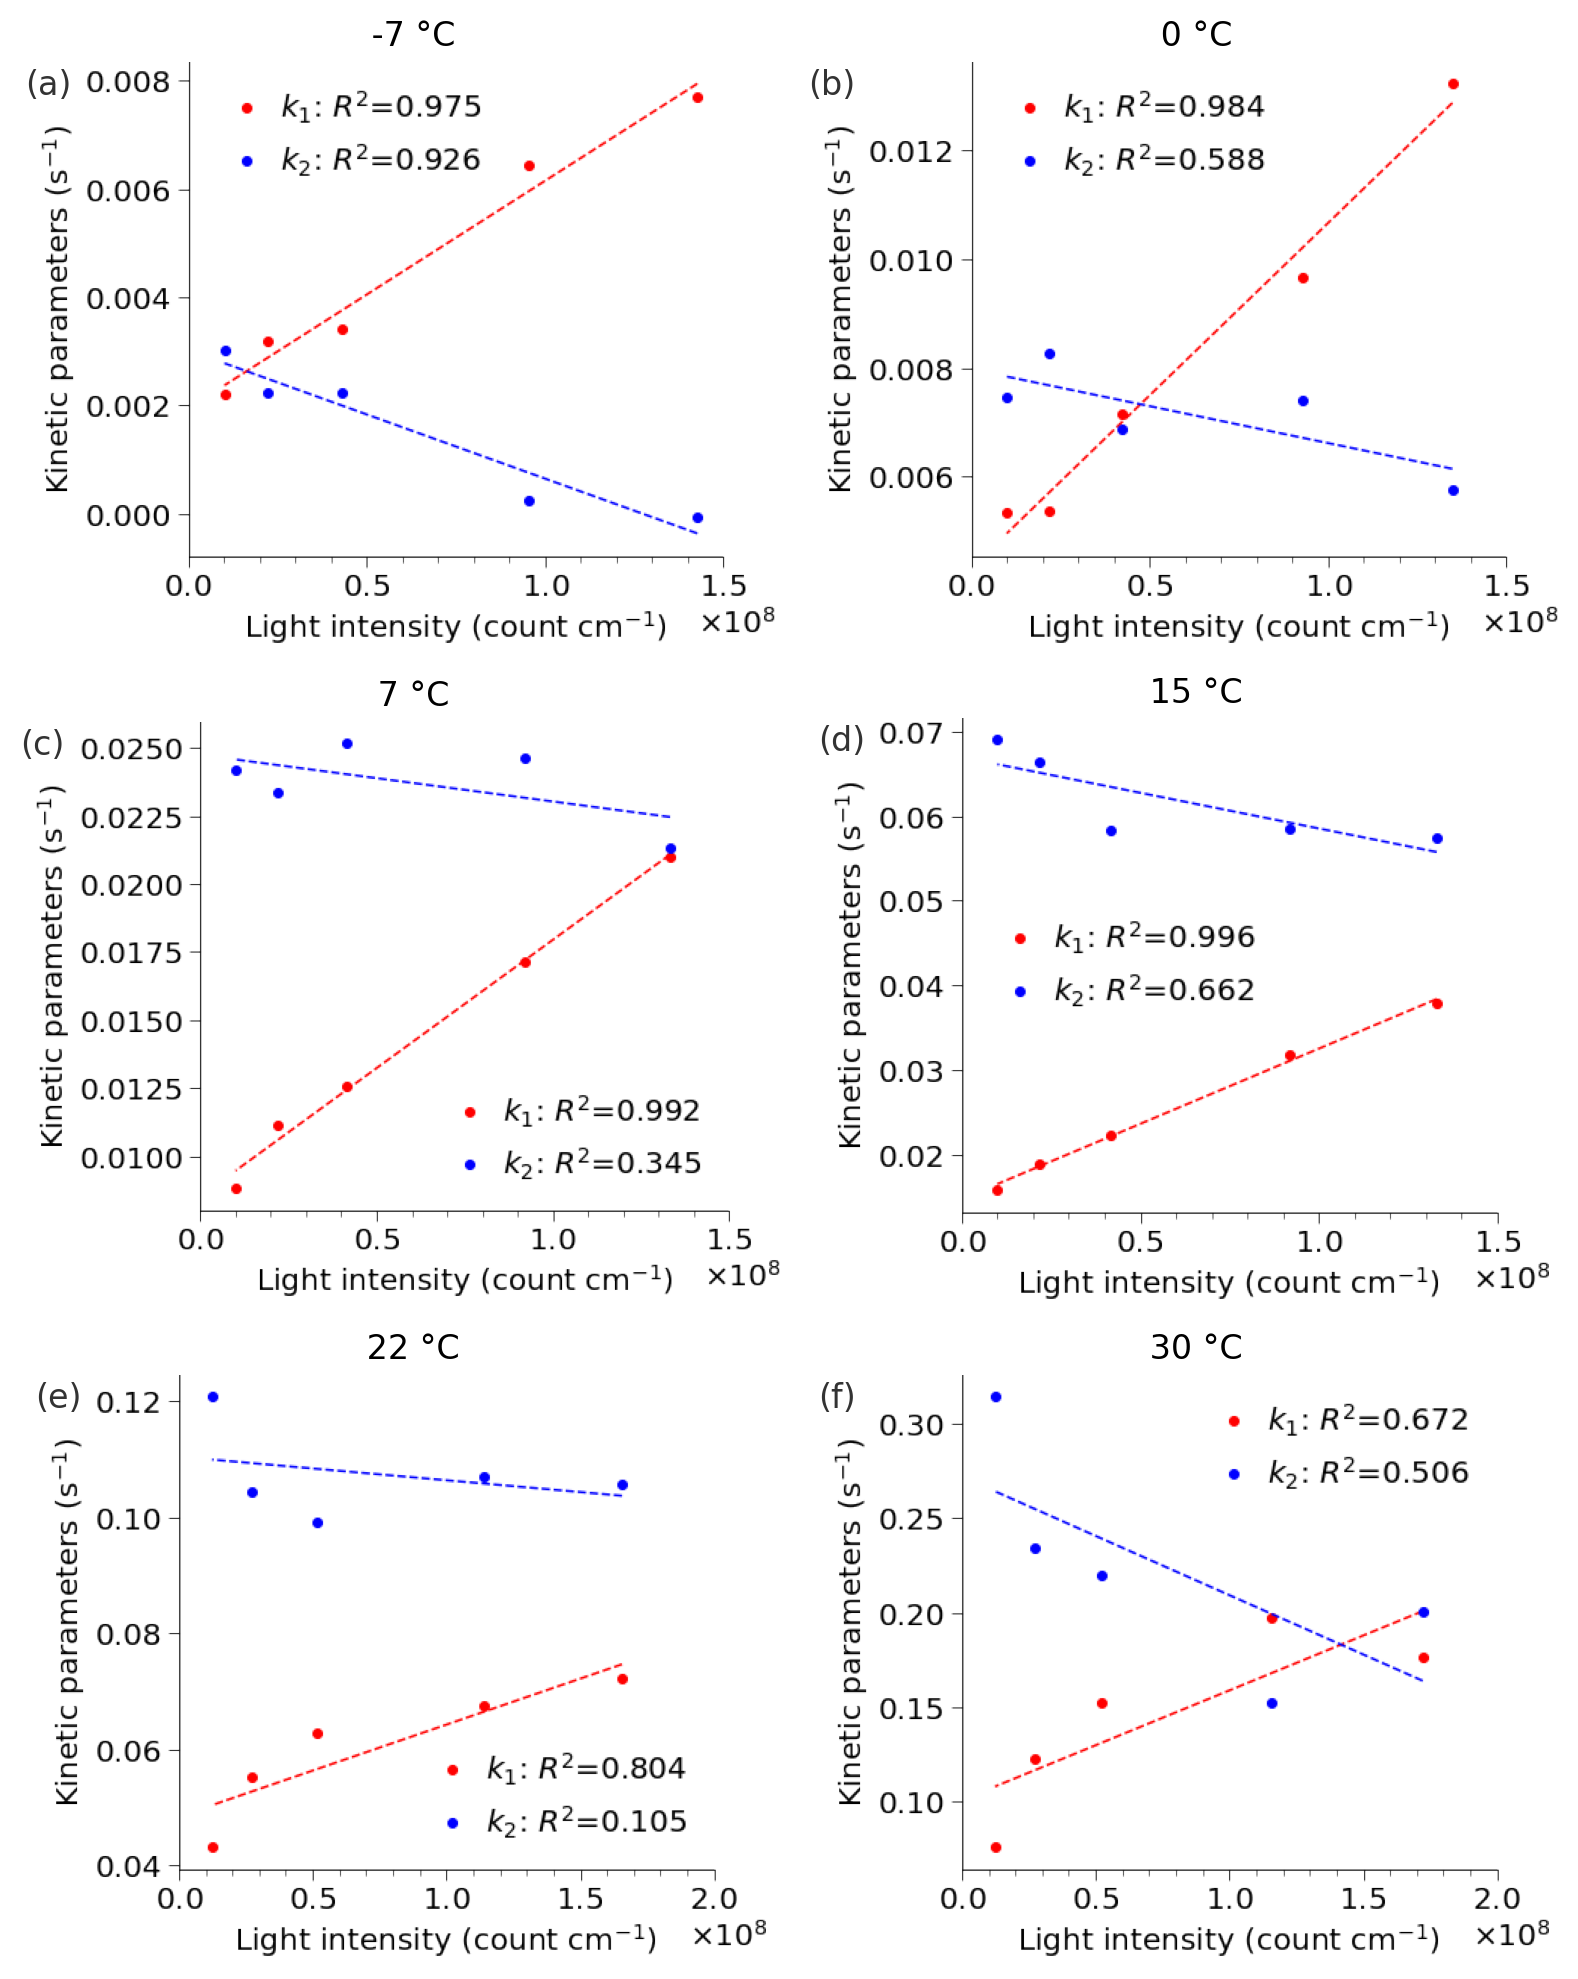

In [32]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# 温度リスト
temperatures = [-7, 0, 7, 15, 22, 30]

# 画像フォルダの親ディレクトリ
parent_folder = "../result/SPA_reanalyze_from_scv/rac-B2"

# DPIと画像サイズの設定
dpi = 200
fig, axes = plt.subplots(3, 2, figsize=(8, 10), dpi=dpi)

# 各温度の画像を読み込んで表示
for i, temp in enumerate(temperatures):
    image_folder = os.path.join(parent_folder, str(temp), "extracted_result", "kinetic_parameters")
    image_path = os.path.join(image_folder, f"{temp}_parameters.png")

    row = i // 2
    col = i % 2
    ax = axes[row, col]

    if os.path.exists(image_path):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.text(-0.02, 0.99, f"({chr(97 + i)})", transform=ax.transAxes, fontsize=12, va='top', ha='left', color='black', backgroundcolor='white', alpha=0.8)
        ax.set_title(f" {temp} °C")  # 温度のラベルを追加
    else:
        print("30°C data missing")
#         ax.text(0.5, 0.5, f"Data\nMissing", transform=ax.transAxes, fontsize=12, va='center', ha='center', color='red')
#         ax.set_title(f" {temp} °C (Data Missing)")  # 温度のラベルを追加

    ax.axis('off')

# レイアウト調整
plt.tight_layout()

result_dir = parent_folder + "/kinetic_parameters_summary/"
os.makedirs(result_dir, exist_ok=True)
output_filename = "output_image.png"  # 保存するファイル名
plt.savefig(result_dir + output_filename, dpi=dpi)

plt.show()
